# Explore dataset previous to models

In [1]:
import json
import os
import re

# import seaborn as sns
import matplotlib.patches as mpatches
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

In [2]:
file_path = f"{ os.getcwd() }/output/"
file_folder = "04.filter_and_join/"
file_folder_postproc = "05.dataset_to_model/"
file_name = "04.preproc_dataset.csv"

In [3]:
df = pd.read_csv(file_path + file_folder + file_name, low_memory=False)

In [4]:
df.shape

(182850, 126)

In [5]:
df.head(5)

created_at               id_str  \
0  Tue Apr 19 04:14:53 +0000 2022  1516269077202882561   
1  Tue Apr 19 04:14:53 +0000 2022  1516269077240635393   
2  Tue Apr 19 04:14:54 +0000 2022  1516269079212044288   
3  Tue Apr 19 04:14:54 +0000 2022  1516269079841198087   
4  Tue Apr 19 04:14:54 +0000 2022  1516269082282180611   

                                                text                   source  \
0  RT @delucca: Lula, 76 anos // Aécio Neves, 62 ...  Twitter for Android\n\n   
1      Nunca senti tanto orgulho da Xuxa meneghel ❤️   Twitter for iPhone\n\n   
2  RT @2018Edu: @brealt 1) Eu voto no Lula com Al...  Twitter for Android\n\n   
3  RT @rocosari1964: É Jair ou Já era...\n#Bolson...  Twitter for Android\n\n   
4  RT @lilithzgrl: pode tirar o titulo pra votar ...      Twitter Web App\n\n   

  truncated is_quote_status quote_count reply_count retweet_count  \
0     False           False         0.0         0.0           0.0   
1     False           False         0.0         0.0           0.0   
2     False           False         0.0         0.0           0.0   
3     False           False         0.0         0.0           0.0   
4     False           False         0.0         0.0           0.0   

   favorite_count  ... extended_tweet.entities.urls_url  \
0             0.0  ...                              NaN   
1             0.0  ...                              NaN   
2             0.0  ...                              NaN   
3             0.0  ...                              NaN   
4             0.0  ...                              NaN   

  retweeted_status.quoted_status.extended_tweet.entities.urls_url  \
0                                                NaN                
1                                                NaN                
2                                                NaN                
3                                                NaN                
4                                                NaN                

                      text_url    retweeted_status.text_url  \
0  ['https://t.co/r6Ta87MMrq']  ['https://t.co/r6Ta87MMrq']   
1                           []                          NaN   
2                           []  ['https://t.co/qGlUBx95gY']   
3  ['https://t.co/s5e0eqZjgm']  ['https://t.co/s5e0eqZjgm']   
4                           []                           []   

  retweeted_status.extended_tweet.full_text_url quoted_status.text_url  \
0                                           NaN                    NaN   
1                                           NaN                    NaN   
2                                            []                    NaN   
3                                           NaN                    NaN   
4                                           NaN                    NaN   

  retweeted_status.quoted_status.text_url extended_tweet.full_text_url  \
0                                     NaN                          NaN   
1                                     NaN                          NaN   
2                                     NaN                          NaN   
3                                     NaN                          NaN   
4                                     NaN                          NaN   

  retweeted_status.quoted_status.extended_tweet.full_text_url  \
0                                                NaN            
1                                                NaN            
2                                                NaN            
3                                                NaN            
4                                                NaN            

  quoted_status.extended_tweet.full_text_url  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN  

[5 rows x 126 columns]

In [6]:
df.columns

Index(['created_at', 'id_str', 'text', 'source', 'truncated',
       'is_quote_status', 'quote_count', 'reply_count', 'retweet_count',
       'favorite_count',
       ...
       'extended_tweet.entities.urls_url',
       'retweeted_status.quoted_status.extended_tweet.entities.urls_url',
       'text_url', 'retweeted_status.text_url',
       'retweeted_status.extended_tweet.full_text_url',
       'quoted_status.text_url', 'retweeted_status.quoted_status.text_url',
       'extended_tweet.full_text_url',
       'retweeted_status.quoted_status.extended_tweet.full_text_url',
       'quoted_status.extended_tweet.full_text_url'],
      dtype='object', length=126)

# Col exploration

## Twitter source

In [7]:
df.source.value_counts()

Twitter for Android\n\n           111802
Twitter for iPhone\n\n             34426
Twitter Web App\n\n                32743
Twitter for iPad\n\n                1295
Twitter for Mac\n\n                  515
                                   ...  
politico_perfeito\n\n                  1
World_News_En_to_Ja\n\n                1
Toda Bahia\n\n                         1
bot ibiracu\n\n                        1
NMetropolitanasTwitterPost\n\n         1
Name: source, Length: 235, dtype: int64

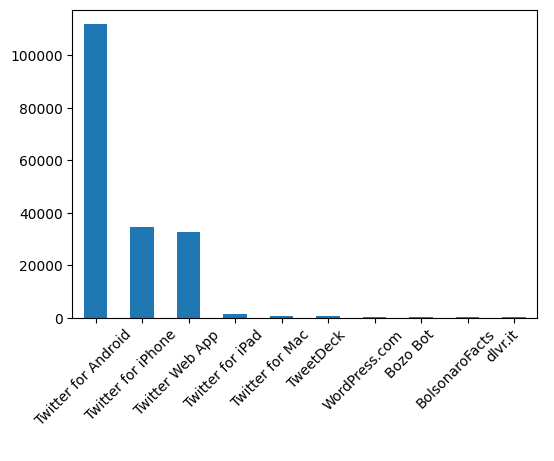

In [34]:
fig, ax = plt.subplots()
df.source.value_counts().head(10).plot.bar(
    figsize=[6, 4],
    ax=ax,
)

# ax.set_ylabel("Dates", fontsize=14, labelpad=20)
# ax.set_xlabel("Sources", fontsize=8, labelpad=20)
plt.xticks(rotation=45)
# plt.tick_params(
#     axis="x",  # changes apply to the x-axis
#     which="both",  # both major and minor ticks are affected
#     bottom=False,  # ticks along the bottom edge are off
#     top=False,  # ticks along the top edge are off
#     labelbottom=False,
# )  # labels along the bottom edge are off
plt.show()

In [9]:
df.shape[0]

182850

In [11]:
df.source.value_counts().head(35)

Twitter for Android\n\n                111802
Twitter for iPhone\n\n                  34426
Twitter Web App\n\n                     32743
Twitter for iPad\n\n                     1295
Twitter for Mac\n\n                       515
TweetDeck\n\n                             496
WordPress.com\n\n                         181
Bozo Bot\n\n                              167
BolsonaroFacts\n\n                        120
dlvr.it\n\n                                89
SEUFUU\n\n                                 81
IFTTT\n\n                                  64
genobolso\n\n                              59
Hootsuite Inc.\n\n                         42
SmiteCraft\n\n                             34
Instagram\n\n                              34
XeuleBot V2\n\n                            32
Cheap Bots, Done Quick!\n\n                28
Twitter, my Android\n\n                    26
Twitter Media Studio\n\n                   25
Echobox\n\n                                24
Zapier.com\n\n                    

## Verified

In [49]:
df.shape

(182850, 126)

In [35]:
df["user.verified"].value_counts()

False    181869
True        977
Name: user.verified, dtype: int64

In [36]:
df[df["user.verified"] == True]["user.name"]

100          Jornal da Globo
707         William De Lucca
1174           Revista Fórum
2051             BandNews TV
3029              Brasil 247
                 ...        
181263      Gerson Camarotti
181358        DiablosRojosMX
182198    TeAtualizei 🇧🇷👊🏻❤️
182619            Estadão 🗞️
182843          Rádio Guaíba
Name: user.name, Length: 977, dtype: object

In [37]:
df[df["user.verified"] == True]["user.name"].value_counts().shape

(512,)

In [38]:
df[df["user.verified"] == False]["user.name"].value_counts().shape

(71390,)

In [15]:
df[df["user.verified"] == True].groupby(by=["user.screen_name"]).agg({
        "user.followers_count": max,
        "user.friends_count": max,
        "user.listed_count": max,
        "user.favourites_count": max,
        "quote_count": max,
        "retweet_count": max,
        "reply_count": max,
        "retweet_count": max,
        "favorite_count": max,
}).sort_values(by="user.followers_count", ascending=False)

user.followers_count user.friends_count user.listed_count  \
user.screen_name                                                             
MidiaNINJA                   999258.0               2855            2556.0   
plinioce                       9954.0                464             136.0   
SenadorRogerio                99326.0                933             485.0   
ANDREBANIWA                    9922.0               2384              85.0   
AnarcoFino                    98939.0               1323             443.0   
...                               ...                ...               ...   
jnascim                      102478.0               7285             797.0   
niklas_franzen                10212.0               2769             103.0   
LeonelRadde                  100764.0               1104             178.0   
carlosholanda_                 1007.0               1458              14.0   
BrunoEnglerDM                100341.0                747             155.0   

                 user.favourites_count quote_count retweet_count reply_count  \
user.screen_name                                                               
MidiaNINJA                        8912         0.0           0.0         0.0   
plinioce                          2762         0.0           0.0         0.0   
SenadorRogerio                   10191         0.0           0.0         0.0   
ANDREBANIWA                      11718         0.0           0.0         0.0   
AnarcoFino                       32166         0.0           0.0         0.0   
...                                ...         ...           ...         ...   
jnascim                          71597         0.0           0.0         0.0   
niklas_franzen                    6667         0.0           0.0         0.0   
LeonelRadde                      67343         0.0           0.0         0.0   
carlosholanda_                   17263         0.0           0.0         0.0   
BrunoEnglerDM                    56985         0.0           0.0         0.0   

                  favorite_count  
user.screen_name                  
MidiaNINJA                   0.0  
plinioce                     0.0  
SenadorRogerio               0.0  
ANDREBANIWA                  0.0  
AnarcoFino                   0.0  
...                          ...  
jnascim                      0.0  
niklas_franzen               0.0  
LeonelRadde                  0.0  
carlosholanda_               0.0  
BrunoEnglerDM                0.0  

[510 rows x 8 columns]

In [16]:
df_aux = df.groupby(by=["user.screen_name"]).agg({
        "user.followers_count": max,
        "user.friends_count": max,
        "user.listed_count": max,
        "user.favourites_count": max,
        "quote_count": max,
        "retweet_count": max,
        "reply_count": max,
        "retweet_count": max,
        "favorite_count": max,
        "user.verified": min
}).sort_values(by="user.followers_count", ascending=False)

In [18]:
df_aux.head(

user.followers_count user.friends_count user.listed_count  \
user.screen_name                                                             
JoodaSilveiraN1                9999.0              10251               5.0   
rafaeudinovo                   9997.0               8850               1.0   
MidiaNINJA                   999258.0               2855            2556.0   
katiaduarte                    9992.0              10987              16.0   
anetepizzimenti                 999.0               1632               1.0   

                 user.favourites_count quote_count retweet_count reply_count  \
user.screen_name                                                               
JoodaSilveiraN1                  30259         0.0           0.0         0.0   
rafaeudinovo                     14606         0.0           0.0         0.0   
MidiaNINJA                        8912         0.0           0.0         0.0   
katiaduarte                     231360         0.0           0.0         0.0   
anetepizzimenti                   1510         0.0           0.0         0.0   

                  favorite_count user.verified  
user.screen_name                                
JoodaSilveiraN1              0.0         False  
rafaeudinovo                 0.0         False  
MidiaNINJA                   0.0          True  
katiaduarte                  0.0         False  
anetepizzimenti              0.0         False

In [19]:
df_aux.shape

(77138, 9)

In [53]:
df_aux["user.verified"].value_counts()

False    76625
True       510
Name: user.verified, dtype: int64

In [23]:
df_aux = df.groupby(by=["retweeted_status.user.screen_name"]).agg({
        "retweeted_status.user.followers_count": max,
        "retweeted_status.user.friends_count": max,
        "retweeted_status.user.listed_count": max,
        "retweeted_status.user.favourites_count": max,
        "retweeted_status.quote_count": max,
        "retweeted_status.retweet_count": max,
        "retweeted_status.reply_count": max,
        "retweeted_status.retweet_count": max,
        "retweeted_status.favorite_count": max,
        "retweeted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="retweeted_status.user.followers_count", ascending=False)

In [24]:
df_aux.shape

(12283, 10)

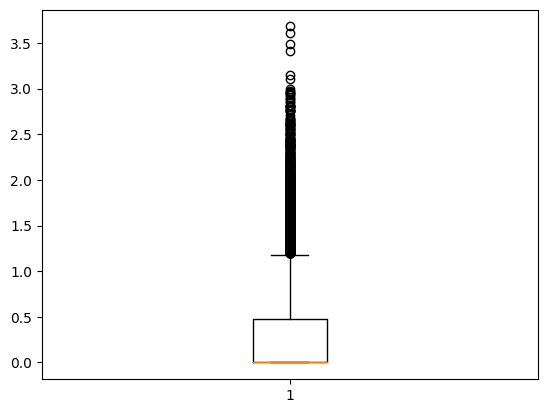

In [37]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [62]:
df_aux["retweeted_status.user.verified"].value_counts()

False    11241
True      1042
Name: retweeted_status.user.verified, dtype: int64

In [42]:
df_aux = df.groupby(by=["quoted_status.user.screen_name"]).agg({
        "quoted_status.user.followers_count": max,
        "quoted_status.user.friends_count": max,
        "quoted_status.user.listed_count": max,
        "quoted_status.user.favourites_count": max,
        "quoted_status.quote_count": max,
        "quoted_status.retweet_count": max,
        "quoted_status.reply_count": max,
        "quoted_status.retweet_count": max,
        "quoted_status.favorite_count": max,
        "quoted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="quoted_status.user.followers_count", ascending=False)

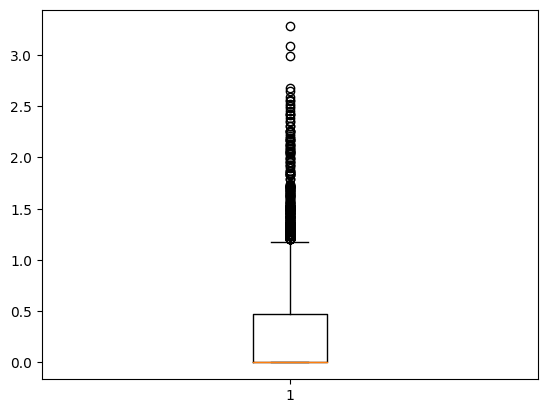

In [43]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [64]:
df_aux.shape

(4682, 9)

In [65]:
df_aux["quoted_status.user.verified"].value_counts()

False    3941
True      741
Name: quoted_status.user.verified, dtype: int64

In [44]:
df_aux = df.groupby(by=["retweeted_status.quoted_status.user.screen_name"]).agg({
        "retweeted_status.quoted_status.user.followers_count": max,
        "retweeted_status.quoted_status.user.friends_count": max,
        "retweeted_status.quoted_status.user.listed_count": max,
        "retweeted_status.quoted_status.user.favourites_count": max,
        "retweeted_status.quoted_status.quote_count": max,
        "retweeted_status.quoted_status.retweet_count": max,
        "retweeted_status.quoted_status.reply_count": max,
        "retweeted_status.quoted_status.retweet_count": max,
        "retweeted_status.quoted_status.favorite_count": max,
        "retweeted_status.quoted_status.user.verified": min,
        "text": 'count',
}).sort_values(by="retweeted_status.quoted_status.user.followers_count", ascending=False)

In [67]:
df_aux.shape

(1854, 9)

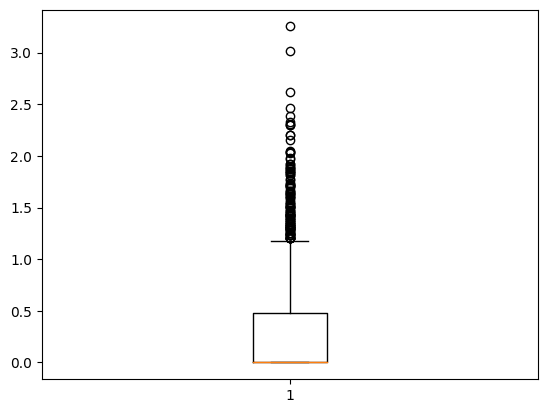

In [45]:
# np.log10(df_aux.text).plot.hist(bins=10)
plt.boxplot(np.log10(df_aux.text))
plt.show()

In [68]:
df_aux["retweeted_status.quoted_status.user.verified"].value_counts()

False    1445
True      409
Name: retweeted_status.quoted_status.user.verified, dtype: int64

## lang

In [12]:
df.lang.value_counts()

pt         160256
und          9357
es           7012
en           3198
tr           1444
fr            371
it            260
in            167
tl            158
ca            138
de             74
lt             65
ja             53
sv             37
et             31
ro             26
eu             23
pl             22
is             20
nl             20
th             20
ht             15
lv             11
hu             11
cs              8
fi              7
hi              6
sl              5
ru              4
da              4
cy              4
ar              4
vi              4
el              4
no              3
ko              2
zh              2
uk              1
13959.0         1
Name: lang, dtype: int64

In [15]:
df.lang.value_counts().shape

(39,)

In [13]:
df[df.lang == "da"]

created_at               id_str  \
21082   Fri Apr 22 22:31:58 +0000 2022  1517632330357223424   
70441   Sat Apr 30 13:49:06 +0000 2022  1520399847932768256   
99879   Wed May 04 22:41:47 +0000 2022  1521983453918425088   
112282  Fri May 06 22:52:42 +0000 2022  1522710979267768323   

                                                     text  \
21082                                         O stm entra   
70441   RT @AlvearClarena: • Jair Camargo - @CRKernels...   
99879             @Millions @Venmo @Lula-Ruger   #Venmome   
112282                                         Internet 2   

                         source truncated is_quote_status quote_count  \
21082   Twitter for Android\n\n     False            True         0.0   
70441   Twitter for Android\n\n     False           False         0.0   
99879       Twitter Web App\n\n     False           False         0.0   
112282  Twitter for Android\n\n     False            True         0.0   

       reply_count retweet_count  favorite_count  ...  \
21082          0.0           0.0             0.0  ...   
70441          0.0           0.0             0.0  ...   
99879          0.0           0.0             0.0  ...   
112282         0.0           0.0             0.0  ...   

       extended_tweet.entities.urls_url  \
21082                               NaN   
70441                               NaN   
99879                               NaN   
112282                              NaN   

       retweeted_status.quoted_status.extended_tweet.entities.urls_url  \
21082                                                 NaN                
70441                                                 NaN                
99879                                                 NaN                
112282                                                NaN                

       text_url    retweeted_status.text_url  \
21082        []                          NaN   
70441        []  ['https://t.co/8Bsr9mCg7O']   
99879        []                          NaN   
112282       []                          NaN   

       retweeted_status.extended_tweet.full_text_url  \
21082                                            NaN   
70441                                             []   
99879                                            NaN   
112282                                           NaN   

             quoted_status.text_url retweeted_status.quoted_status.text_url  \
21082   ['https://t.co/npgUQuxse7']                                     NaN   
70441                           NaN                                     NaN   
99879                           NaN                                     NaN   
112282  ['https://t.co/rukriOJhMb']                                     NaN   

       extended_tweet.full_text_url  \
21082                           NaN   
70441                           NaN   
99879                           NaN   
112282                          NaN   

       retweeted_status.quoted_status.extended_tweet.full_text_url  \
21082                                                 NaN            
70441                                                 NaN            
99879                                                 NaN            
112282                                                NaN            

       quoted_status.extended_tweet.full_text_url  
21082                                          []  
70441                                         NaN  
99879                                         NaN  
112282                ['https://t.co/U1Y4F7KRx3']  

[4 rows x 126 columns]

A priori no hay algo raro ne los idiomas. Coinciden con temas esperados. A priori.

## Tweet types

TODO:
* Create flags for the twitter types (or a multivalue column)

In [47]:
df.shape

(182850, 126)

In [48]:
# df[~(df["retweeted_status.id_str"].isna())].shape
df[
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(113594, 126)

In [49]:
# df[~(df["quoted_status.id_str"].isna())].shape
df[
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(17031, 126)

In [50]:
# df[~(df["retweeted_status.quoted_status_id_str"].isna())].shape
df[
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [51]:
df[
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [52]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(0, 126)

In [53]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(5, 126)

In [54]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(13637, 126)

In [56]:
df[
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna())
].shape

(13642, 126)

In [55]:
df[
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna())
].shape

(38583, 126)

In [57]:
conditions = [
    # Tweet
    (df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
    # Quote+Retweet
    ~(df["retweeted_status.id_str"].isna())
    & ~(df["retweeted_status.quoted_status_id_str"].isna()),
    # Retweet
    ~(df["retweeted_status.id_str"].isna())
    & (df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
    # Quote
    (df["retweeted_status.id_str"].isna())
    & ~(df["quoted_status.id_str"].isna())
    & (df["retweeted_status.quoted_status_id_str"].isna()),
]

choices = ["Tweet", "Quote+Retweet", "Retweet", "Quote"]

df["tw_type"] = np.select(conditions, choices, default="Other")

In [22]:
# !pip install squarify # (algorithm for treemap)
import squarify

In [75]:
# ! pip install mycolorpy
from mycolorpy import colorlist as mcp


['#66c2a5', '#8da0cb', '#a6d854', '#e5c494', '#b3b3b3']


In [87]:
def get_labels_tw_type():
    for index, value in df["tw_type"].value_counts().iteritems():
        print(f"index: {index}, value: {value}")
        yield f"{index} \n ({value})"

index: Retweet, value: 113594
index: Tweet, value: 38583
index: Quote, value: 17031
index: Quote+Retweet, value: 13642


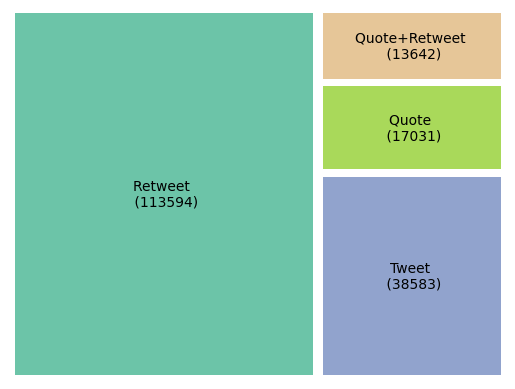

In [89]:
squarify.plot(
    sizes=df["tw_type"].value_counts(),
    label=get_labels_tw_type(),
    alpha=0.8,
    color=mcp.gen_color(cmap="Set2",n=5),
    pad=2
)
plt.axis("off")
plt.show()

## hashtags

todo:
* Todos los hashtags preproc de la misma manera (Moverlo al anterior)
* Nube de palabras
* 

In [22]:
df["hashtags"].to_list()[3]

"['BolsonaroReeleito2022', 'BolsonaroPresidenteAte2026']"

In [23]:
import ast

ast.literal_eval(df["hashtags"].to_list()[3])

['BolsonaroReeleito2022', 'BolsonaroPresidenteAte2026']

In [24]:
aux = (
    df[~(df["hashtags"].isna())]["hashtags"]
    .str.lower()
    .apply(ast.literal_eval)
    .to_list()
)

In [25]:
output = []
for i in aux:
    if len(i) > 1:
        output = output + i

In [26]:
output[0:10]

['bolsonaroreeleito2022',
 'bolsonaropresidenteate2026',
 'bolsonaroreeleito2022',
 'bolsonaropresidenteate2026',
 'direitaforte',
 'bolsonaroreeleitoem2022',
 'elenão',
 'lulasim',
 'anittapelobrasil',
 'debateciroelula']

In [27]:
pd.DataFrame(output, columns=["hashtag"]).hashtag.value_counts()

bolsonaroreeleitoem2022    619
vamosjuntospelobrasil      520
bolsomusk                  290
lula                       256
lulapresidente13           256
                          ... 
22                           1
le_sserafim                  1
campeonatobrasileiro         1
brasileirao                  1
queridolula                  1
Name: hashtag, Length: 1543, dtype: int64

## Preproc de texto

In [28]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [29]:
punctuation_list = string.punctuation

In [30]:
print(punctuation_list)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [31]:
def remove_punctuation(text):
    no_punct = [words for words in text if words not in punctuation_list]
    words_wo_punct = "".join(no_punct)
    return words_wo_punct

In [32]:
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b
def remove_emoji(string):
    emoji_pattern = re.compile(
        "["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "]+",
        flags=re.UNICODE,
    )
    return emoji_pattern.sub(r"", string)

In [33]:
def tokenize(text):
    split = re.split("\W+", text)
    return split

In [34]:
# !pip install nltk

In [35]:
import nltk

In [36]:
# nltk.download()

In [37]:
stopword = nltk.corpus.stopwords.words("portuguese")
print(stopword[:11])

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para']


In [38]:
def remove_stopwords(text):
    text = [word for word in text if (word not in stopword) & (word != "")]
    return text

In [39]:
df["text"]

0         RT @delucca: Lula, 76 anos // Aécio Neves, 62 ...
1             Nunca senti tanto orgulho da Xuxa meneghel ❤️
2         RT @2018Edu: @brealt 1) Eu voto no Lula com Al...
3         RT @rocosari1964: É Jair ou Já era...\n#Bolson...
4         RT @lilithzgrl: pode tirar o titulo pra votar ...
                                ...                        
182845    TODO LADRÃO ODEIA A POLÍCIA, SERÁ QUE LULA VAI...
182846    RT @renatoag2: @lisianebessa1 Esse pedetista e...
182847    @VillaMarcovilla Você cagou com a foto do Bols...
182848    RT @AnaPaulaVolei: Sr. Excelentíssimo Magnânim...
182849    RT @brom_elisa: ⚖️Ministro Kassio Nunes Marque...
Name: text, Length: 182850, dtype: object

In [40]:
df["text"] = df["text"].astype(str)

In [41]:
df["text"] = df["text"].apply(lambda x: remove_punctuation(x))
df.text.head()

0    RT delucca Lula 76 anos  Aécio Neves 62 anos h...
1        Nunca senti tanto orgulho da Xuxa meneghel ❤️
2    RT 2018Edu brealt 1 Eu voto no Lula com Alckmi...
3    RT rocosari1964 É Jair ou Já era\nBolsonaroRee...
4    RT lilithzgrl pode tirar o titulo pra votar es...
Name: text, dtype: object

In [42]:
df["text"] = df["text"].apply(lambda x: remove_emoji(x))
df["text"].head()

0    RT delucca Lula 76 anos  Aécio Neves 62 anos h...
1          Nunca senti tanto orgulho da Xuxa meneghel 
2    RT 2018Edu brealt 1 Eu voto no Lula com Alckmi...
3    RT rocosari1964 É Jair ou Já era\nBolsonaroRee...
4    RT lilithzgrl pode tirar o titulo pra votar es...
Name: text, dtype: object

In [43]:
df["text"] = df["text"].apply(lambda x: tokenize(x.lower()))
df["text"].head()

0    [rt, delucca, lula, 76, anos, aécio, neves, 62...
1    [nunca, senti, tanto, orgulho, da, xuxa, meneg...
2    [rt, 2018edu, brealt, 1, eu, voto, no, lula, c...
3    [rt, rocosari1964, é, jair, ou, já, era, bolso...
4    [rt, lilithzgrl, pode, tirar, o, titulo, pra, ...
Name: text, dtype: object

In [44]:
df["text"] = df["text"].apply(lambda x: remove_stopwords(x))
df["text"].head()

0    [rt, delucca, lula, 76, anos, aécio, neves, 62...
1       [nunca, senti, tanto, orgulho, xuxa, meneghel]
2    [rt, 2018edu, brealt, 1, voto, lula, alckmim, ...
3    [rt, rocosari1964, jair, bolsonaroreeleito2022...
4    [rt, lilithzgrl, pode, tirar, titulo, pra, vot...
Name: text, dtype: object

In [45]:
df["text"][0]

['rt',
 'delucca',
 'lula',
 '76',
 'anos',
 'aécio',
 'neves',
 '62',
 'anos',
 'httpstcor6ta87mmrq']

In [46]:
from collections import Counter

cnt = Counter()
for text in df["text"].values:
    for word in text:
        cnt[word] += 1

cnt.most_common(10)

[('rt', 127609),
 ('bolsonaro', 59977),
 ('lula', 55770),
 ('presidente', 14511),
 ('brasil', 11666),
 ('vai', 11609),
 ('pra', 8074),
 ('jair', 7764),
 ('bolsomusk', 6851),
 ('sobre', 6456)]

In [47]:
# TODO: Stemming?

In [48]:
df["hashtags"] = df["hashtags"].astype(str)
df["hashtags"] = df["hashtags"].apply(lambda x: remove_punctuation(x))
df["hashtags"] = df["hashtags"].apply(lambda x: remove_emoji(x))
df["hashtags"] = df["hashtags"].apply(lambda x: tokenize(x.lower()))
df["hashtags"] = df["hashtags"].apply(lambda x: remove_stopwords(x))

In [49]:
df["hashtags"].head()

0                                                   []
1                                                   []
2                                                   []
3    [bolsonaroreeleito2022, bolsonaropresidenteate...
4                                                   []
Name: hashtags, dtype: object

In [50]:
from collections import Counter

cnt = Counter()
for hashtags in df["hashtags"].values:
    for word in hashtags:
        cnt[word] += 1

cnt.most_common(10)

[('bolsomusk', 6782),
 ('vamosjuntospelobrasil', 3279),
 ('bolsonaroreeleitoem2022', 2822),
 ('equipelula', 811),
 ('lulanuncamais', 639),
 ('bolsonaroreeleito2022', 540),
 ('bolsonaro2022', 488),
 ('mitadanodicaprio', 434),
 ('lulanoprimeiroturno', 369),
 ('ospingosnosis', 342)]

In [51]:
df["retweeted_status.text"] = df["retweeted_status.text"].astype(str)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_punctuation(x)
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_emoji(x)
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: tokenize(x.lower())
)
df["retweeted_status.text"] = df["retweeted_status.text"].apply(
    lambda x: remove_stopwords(x)
)

In [52]:
df["retweeted_status.text"].head()

0    [lula, 76, anos, aécio, neves, 62, anos, https...
1                                                [nan]
2    [brealt, 1, voto, lula, alckmim, claro, posiçõ...
3    [jair, bolsonaroreeleito2022, bolsonaropreside...
4    [pode, tirar, titulo, pra, votar, ano, nao, ti...
Name: retweeted_status.text, dtype: object

In [53]:
df["retweeted_status.text"] = df["retweeted_status.text"].astype(str)

In [54]:
from collections import Counter

cnt = Counter()
for url in df["retweeted_status.text"].values:
    for word in hashtags:
        cnt[word] += 1
    # cnt[url] += 1

cnt.most_common(10)

[]

## URLS

In [55]:
aux = (
    df[~(df["retweeted_status.entities.urls_url"].isna())][
        "retweeted_status.entities.urls_url"
    ]
    .str.lower()
    .apply(ast.literal_eval)
    .to_list()
)

In [56]:
aux[0:20]

[[],
 ["https://t.co/qglubx95gy',",
  "https://twitter.com/i/web/status/1515884624874033157',"],
 [],
 [],
 ["https://t.co/mougdhtsen',",
  "https://twitter.com/i/web/status/1516255128478756866',"],
 ["https://t.co/x7zbzvmxfi',",
  "https://twitter.com/i/web/status/1515885302296064004',"],
 [],
 ["https://t.co/secfhrlqj7',",
  "https://twitter.com/i/web/status/1515637364625920000',"],
 ["https://t.co/dj4fjsctco',",
  "https://twitter.com/i/web/status/1515014481335787521',"],
 [],
 ["https://t.co/xsogo8of3q',",
  "https://twitter.com/i/web/status/1516113804156977152',"],
 [],
 [],
 ["https://t.co/jncxunffz7',",
  "https://twitter.com/i/web/status/1515886679986429958',"],
 ["https://t.co/fxd7ynssi2',",
  "https://twitter.com/i/web/status/1516165009704996864',"],
 ["https://t.co/yk1ckhveff',",
  "https://twitter.com/i/web/status/1516242779659247619',"],
 ["https://t.co/89arhdello',",
  "https://twitter.com/i/web/status/1516263704899338240',"],
 ["https://t.co/8b2dguizlw',",
  "https://twi

In [57]:
from collections import Counter

cnt = Counter()
for urls in aux:
    # for word in df["retweeted_status.entities.urls_url"].values:
    for word in urls:
        cnt[word] += 1
    # cnt[word] += 1

cnt.most_common(30)

[("https://t.co/dgao4gyif8',", 770),
 ("https://twitter.com/i/web/status/1518363356016611328',", 770),
 ("https://t.co/onntlg7jdo',", 716),
 ("https://twitter.com/i/web/status/1527663875352629249',", 716),
 ("https://t.co/mnagywotzf',", 687),
 ("https://twitter.com/i/web/status/1517610465454665735',", 687),
 ("https://t.co/7crunsezyv',", 500),
 ("https://twitter.com/i/web/status/1521969934422921216',", 500),
 ("https://t.co/mvhq5wi5wu',", 481),
 ("https://twitter.com/i/web/status/1518371882332225536',", 481),
 ("https://t.co/euv5wxchdf',", 445),
 ("https://twitter.com/i/web/status/1521913142699347971',", 445),
 ("https://youtu.be/nhtmymvwxeo',", 386),
 ("https://t.co/udjebfbtgj',", 376),
 ("https://t.co/ycailt7fzv',", 284),
 ("https://twitter.com/i/web/status/1521908705540849665',", 284),
 ("https://t.co/cuxhptxp7s',", 276),
 ("https://twitter.com/i/web/status/1517597492757508096',", 276),
 ("https://t.co/rgzj66vr3d',", 270),
 ("https://twitter.com/i/web/status/1521855163438354432',", 

# User id

Creadores de tweets (TW, RT, QT)

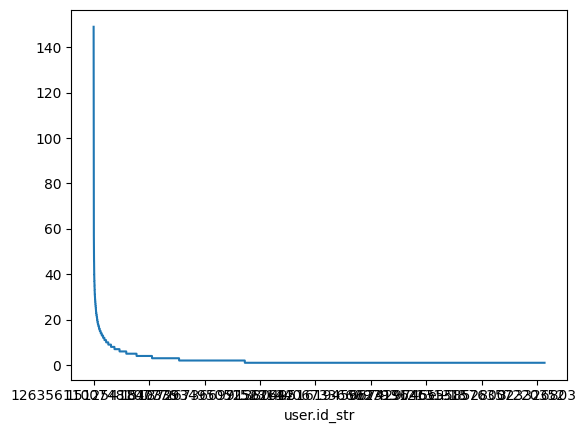

In [58]:
df.groupby(by=["user.id_str"]).text.count().sort_values(ascending=False).plot()
plt.show()

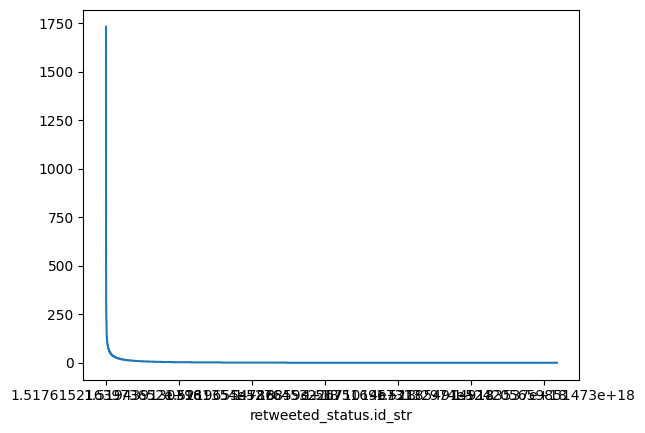

In [59]:
df.groupby(by=["retweeted_status.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

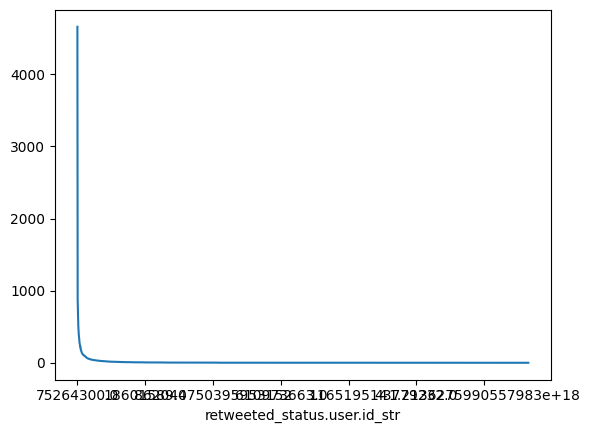

In [62]:
df.groupby(by=["retweeted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

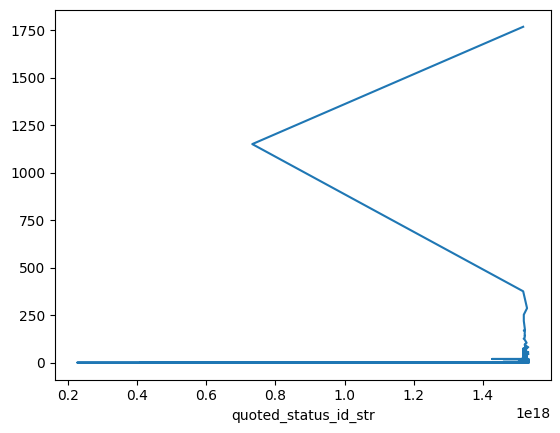

In [61]:
df.groupby(by=["quoted_status_id_str"]).text.count().sort_values(ascending=False).plot()
plt.show()

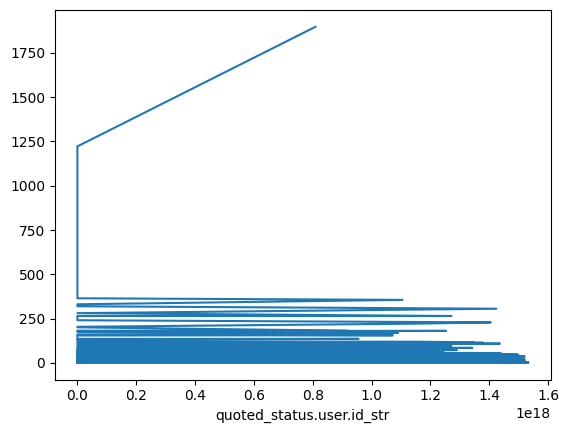

In [63]:
df.groupby(by=["quoted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

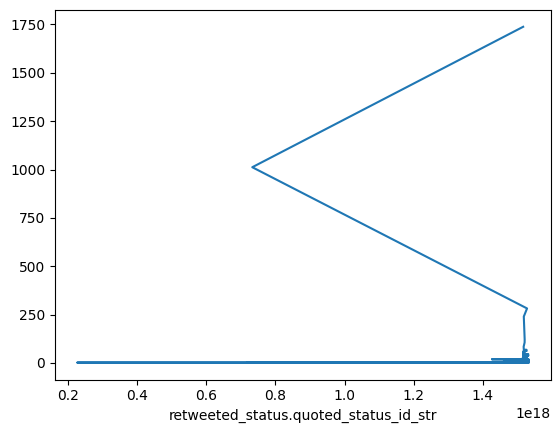

In [64]:
df.groupby(by=["retweeted_status.quoted_status_id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

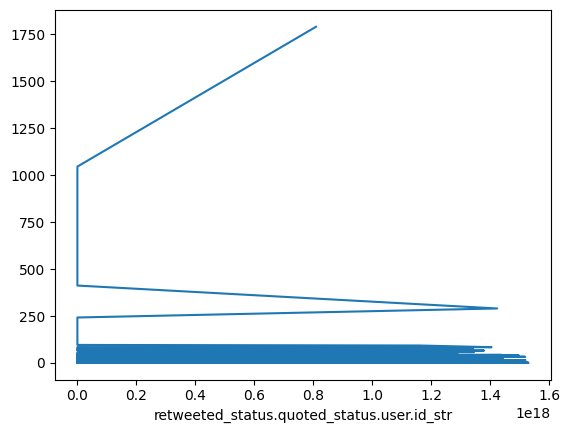

In [66]:
df.groupby(by=["retweeted_status.quoted_status.user.id_str"]).text.count().sort_values(
    ascending=False
).plot()
plt.show()

## Next steps

cosas que no estan ni empezadas, o que ya se que toca hacer (En alguna otra parte/notebook)

TODO:
* Sources sin caracteres de salto de linea
* Sacar url place
* Hacer un preproc de hashtags y url, para todos
* To lower todas las que son string
* Links entre cuentas (tw <- rt, tw <- qt, ...)
    * Nodos y referenciales, cuales? 
    * Pesos? Asociados a las interacciones?
    * Mencion especial si es verificado?
* Toca filtrar algo? Solo retweet por ejemplo?
* Cuantos tweets unicos RT tengo, cuanto quotes, 
* Flags de: autor, comentador, amplificador, ...
* Clasificar en medios, individuos y políticos?
* Nube de palabras de todo
* Kmeans (Con que columnas?)
